In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("iris.CSV")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 6)

In [8]:
df = df.drop(['Id'],axis=1)

In [9]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],['0','1','2'],inplace=True)

In [11]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
df[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,0
37,4.9,3.1,1.5,0.1,0
142,5.8,2.7,5.1,1.9,2


In [13]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

C:\Users\sandip singh\AppData\Local\Temp\ipykernel_13144\1689822719.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Greens')


<Axes: >

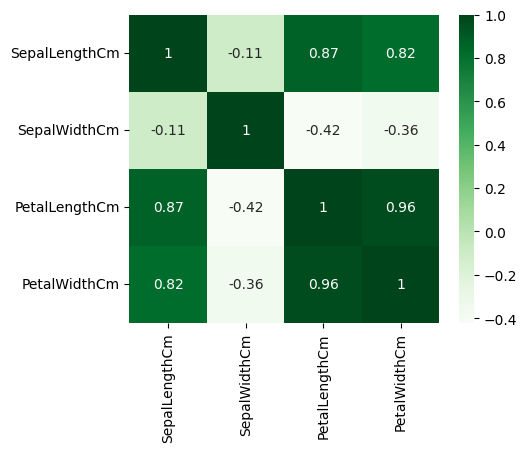

In [14]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

<Figure size 500x400 with 0 Axes>

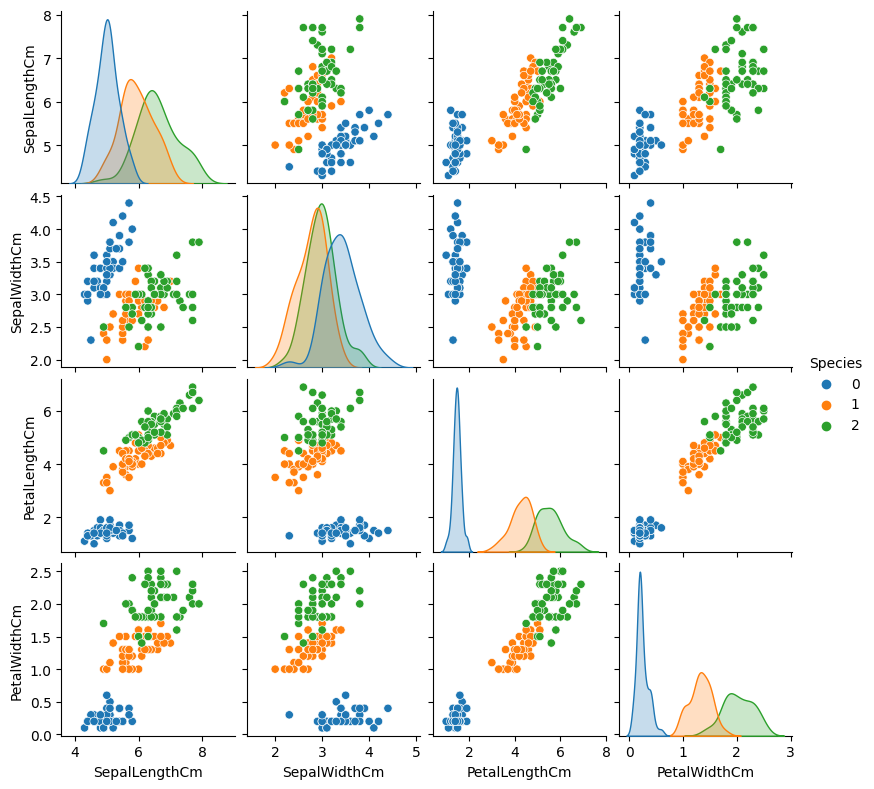

In [15]:
plt.figure(figsize=(5,4))
sns.pairplot(df,hue="Species",height=2)

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

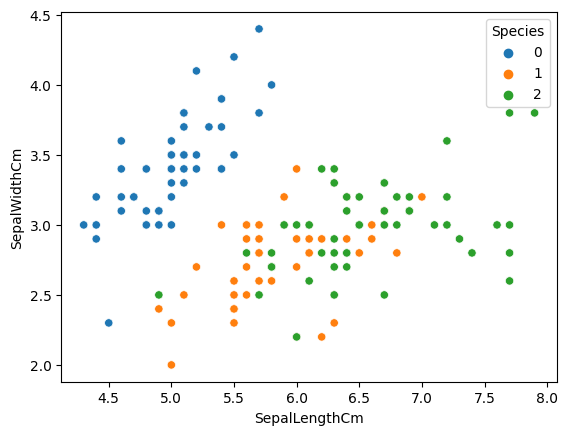

In [24]:
sns.scatterplot(df,x = 'SepalLengthCm',y ='SepalWidthCm',hue = 'Species')

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

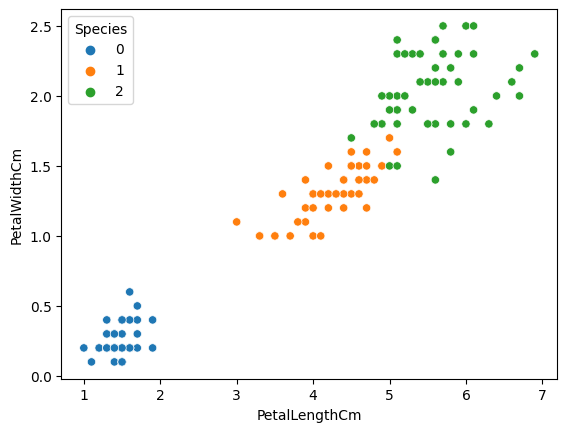

In [17]:
sns.scatterplot(df,x = 'PetalLengthCm',y ='PetalWidthCm',hue = 'Species')

In [18]:
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [20]:
model = KNeighborsClassifier() 

In [21]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
y = model.predict(X_test)
y

array(['0', '1', '1', '1', '0', '2', '0', '1', '1', '2', '2', '1', '0',
       '1', '1', '1', '2', '0', '0', '0', '0', '1', '2', '0', '2', '0',
       '2', '2', '1', '2'], dtype=object)

In [23]:
acc = accuracy_score(y_test,y)
round(acc*100)

97